<a href="https://colab.research.google.com/github/dikshap07/Algorithms-and-Data-Structures/blob/master/AllkindsOfNodeDepths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem:  Write a function to get the sum of node depths for all possible subtrees in a given binary tree


###For the below binary tree the output will be: 26

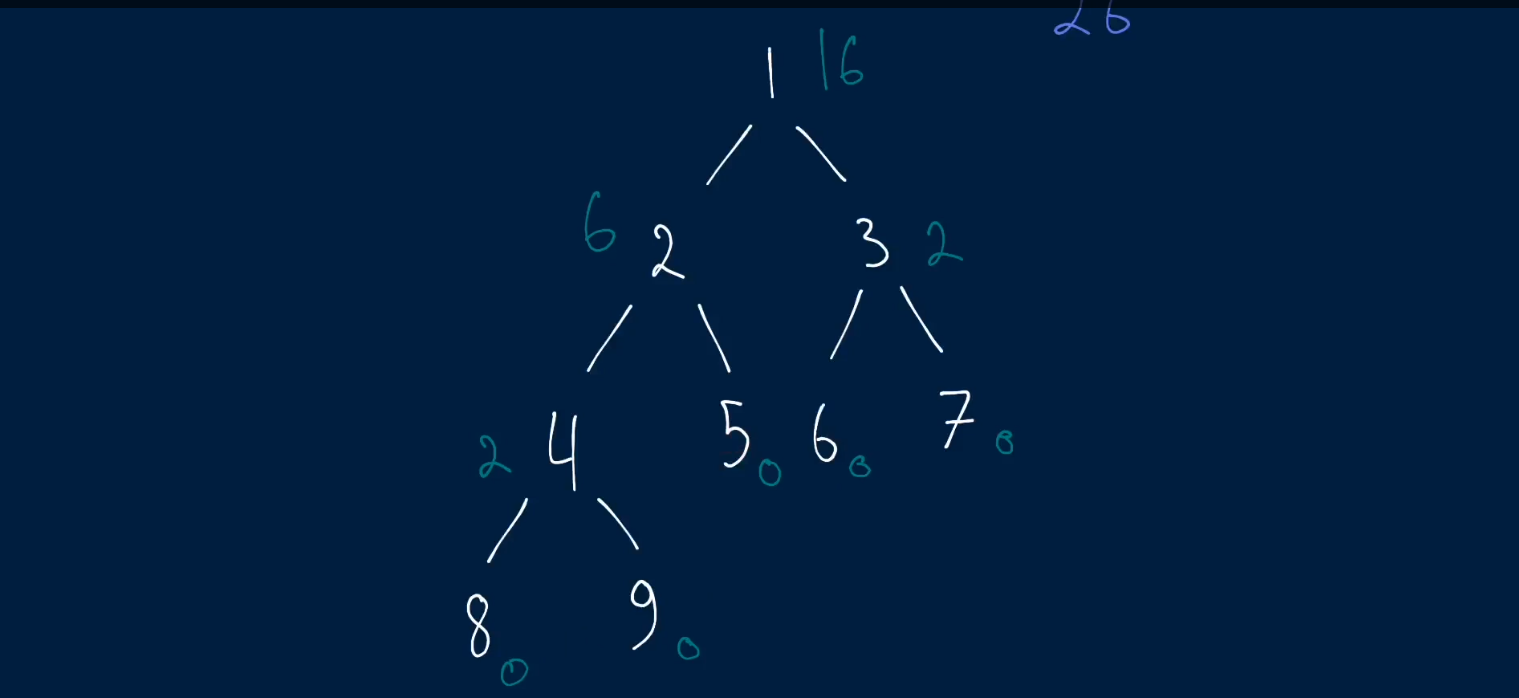

###Naive Solution--> USING ITERATION
### If binary tree balanced: O(Nlog(N)) : time complexity
  ###   --> if binary tree unbalanced : O(N**2) : time complexity
### Space Complexity--> O(h): h = height of the tree  

In [1]:
#iterating through the binary tree inOrder and then calling the node_depth_sum function at each node treating the node as a subtree and adding that

def node_depth_sum(tree,depth = 0):

  if tree is None:
    return 0

  return depth + node_depth_sum(tree.left,depth+1) + node_depth_sum(tree.right,depth+1)

def allKindNodeDepth(tree):

  

  stack = []  #empty stack
  sum_depth = 0

  currentNode = tree

  
  branch = True

  while branch == True:  #to iterate over the tree


    if currentNode is not None:
      stack.append(currentNode)
      #print(stack)
      currentNode = currentNode.left
    

    elif currentNode is None and len(stack) > 0:

      popped_element = stack.pop()
      #print('currentNone ')
      #print('ON NODE:',popped_element.value)
      node_depth = node_depth_sum(popped_element,0)
      #print(f'node depth sum for {popped_element.value} {node_depth}')
      sum_depth+=node_depth
      #print(f'sum after node   {popped_element.value} {sum_depth}')
      currentNode = popped_element.right


    elif currentNode is None and len(stack) == 0:

      branch = False
      break

  return sum_depth


###Naive Solution--> USING RECURSION
### If binary tree balanced: O(Nlog(N)) : time complexity
  ###   --> if binary tree unbalanced : O(N**2) : time complexity
### Space Complexity--> O(h): h = height of the tree  

In [2]:
def node_depth_sum(tree,depth = 0):

  if tree is None:
    return 0

  return depth + node_depth_sum(tree.left,depth+1) + node_depth_sum(tree.right,depth+1)


def allKind_nodedepth_sum(tree):
  final_sum = 0

  if tree is not None:
    
    suml = allKind_nodedepth_sum(tree.left)
    final_sum = suml+ node_depth_sum(tree,0)
    sumr =allKind_nodedepth_sum(tree.right)
    final_sum+= sumr


  return final_sum
  
#OR

def allKindnodedepth_sum(tree):
  

  if tree is None:
    return 0

  return allKindnodedepth_sum(tree.left) + allKindnodedepth_sum(tree.right) + node_depth_sum(tree)

  
  


###Optimised Method: Using hash tables--> we use the formula 
#### nodedepthsum = nodedepthsum(leftsubtree) + no of nodes in leftsubtree +nodedepthsum(rightsubtree) + no of nodes in rightsubtree

#### Time Complexity: O(N): N no of nodes
#### Space Complexity : O(N)

In [12]:
def all_kind_node_depth(root):
  nodeCounts ={}  #hash table to store depths for all nodes
  addNodeCount(root,nodeCounts)                             #first traversal- to count the number of nodes
  nodeDepths = {}   #hash table to store depths for all nodes
  addNodeDepth(root,nodeDepths,nodeCounts)                  #second traversal - to get depth for all nodes

  return sumOfall(root,nodeDepths)                                    #thirs traversal - to get total sum of all depths



def addNodeCount(node,nodeCounts):
  nodeCounts[node] = 1   #1 because we need to count that node too

  if node.left is not None:

    addNodeCount(node.left,nodeCounts)   #will add the node count for node.left in the hash table
    nodeCounts[node] += nodeCounts[node.left]   #add node count of left child to the node's count


  if node.right is not None:

    addNodeCount(node.right,nodeCounts)   #will add the node count for node.right in the hash table
    nodeCounts[node] += nodeCounts[node.right]   #add node count of right child to the node's count


def addNodeDepth(node,nodeDepths,nodeCounts):

  nodeDepths[node] = 0    # 0 because depth of root node wrt its tree is 0
  
  if node.left is not None:
    addNodeDepth(node.left,nodeDepths,nodeCounts)

    #using formula
    nodeDepths[node] += nodeDepths[node.left] + nodeCounts[node.left]   #constant time operation

  if node.right is not None:
    addNodeDepth(node.right,nodeDepths,nodeCounts)

    #using formula
    nodeDepths[node] += nodeDepths[node.right] + nodeCounts[node.right]     #constant time operation


def sumOfall(node,nodeDepths):

  if node is None:
    return 0

  return sumOfall(node.left,nodeDepths) + sumOfall(node.right,nodeDepths) + nodeDepths[node]

###Optimised Method: Using Recursion--> we use the formula 
#### nodedepthsum = nodedepthsum(leftsubtree) + no of nodes in leftsubtree +nodedepthsum(rightsubtree) + no of nodes in rightsubtree

#### Time Complexity: O(N): N no of nodes
#### Space Complexity : O(N)

In [20]:
def all_nodedepth_sum(tree):

  return getTreeInfo(tree).sum_of_AllDepths


class TreeInfo():

  def __init__(self,numOfnodes,sum_of_depths,sum_of_AllDepths):

    self.numOfnodes = numOfnodes
    self.sum_of_depths = sum_of_depths
    self.sum_of_AllDepths = sum_of_AllDepths


def getTreeInfo(node):

  if node is None:  #if we reach the end of tree
    return TreeInfo(0,0,0)

  
  leftTreeInfo = getTreeInfo(node.left)
  rightTreeInfo = getTreeInfo(node.right)


  #using formula
  leftTreeDepth_sum  = leftTreeInfo.sum_of_depths + leftTreeInfo.numOfnodes
  rightTreeDepth_sum  = rightTreeInfo.sum_of_depths + rightTreeInfo.numOfnodes


  #num of nodes the node related tree
  numOfnodes = 1 + leftTreeInfo.numOfnodes + rightTreeInfo.numOfnodes

  #getting sum_of_depths for the node related tree

  sum_of_depths = leftTreeDepth_sum + rightTreeDepth_sum

  #getting sum_of_AllDepths for the node related tree

  sum_of_AllDepths = leftTreeInfo.sum_of_AllDepths + rightTreeInfo.sum_of_AllDepths + sum_of_depths

  return TreeInfo(numOfnodes,sum_of_depths,sum_of_AllDepths)



###Test

In [21]:
class BinaryTree:

  def __init__(self,value):

    self.value = value
    self.left = None
    self.right = None
    self.parent = None


bt = BinaryTree(1)
bt.parent = None
bt.left = BinaryTree(2)
bt.right = BinaryTree(3)
bt.left.parent = bt
bt.right.parent = bt
bt.left.left = BinaryTree(4)
bt.left.right = BinaryTree(5)

#bt.left.left.parent = bt.left
k = bt.left.left
k.left = BinaryTree(8)
k.right = BinaryTree(9)

bt.right.left = BinaryTree(6)
bt.right.right = BinaryTree(7)

In [15]:
#testing naive solution 1: uses iteration
print(allKindNodeDepth(bt))

26


In [16]:
##testing naive solution 2.1: uses recursion
print(allKind_nodedepth_sum(bt))

26


In [17]:
##testing naive solution 2.1: uses recursion
print(allKindnodedepth_sum(bt))

26


In [18]:
##testing optimised solution 1:

print(all_kind_node_depth(bt))

26


In [22]:
##testing optimised solution 2: uses recursion

print(all_nodedepth_sum(bt))

26
